# Customer Segmentation Using K-Means Clustering

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('Online Retail.csv',encoding='latin-1')

In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [24]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Preprocessing

In [26]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [29]:
print(f'Percentage of missing data from CustomerID column is: {round(df.CustomerID.isna().sum() / df.shape[0] *100,2)}%')

Percentage of missing data from CustomerID column is: 24.93%


In [30]:
df['Description'].fillna('No Description',inplace=True)

In [31]:
df['Description'].isna().sum()

0

In [33]:
df=df.dropna()

In [34]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
df.shape

(406829, 8)

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


# Feature Engineering

In [39]:
df['Quantity']=df['Quantity'].abs()

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_8400/3410446947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity']=df['Quantity'].abs()


In [40]:
df.drop(df[df['UnitPrice'] == 0].index, axis=0, inplace=True)

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_8400/2711867798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['UnitPrice'] == 0].index, axis=0, inplace=True)


In [43]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_8400/523712759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [48]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

customer_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

customer_df.rename(columns={'InvoiceDate': 'recency', 'InvoiceNo': 'frequency', 'TotalPrice': 'monetary'}, inplace=True)

customer_df.info()

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_8400/4197706033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_8400/4197706033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


<class 'pandas.core.frame.DataFrame'>
Index: 4371 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    4371 non-null   int64  
 1   frequency  4371 non-null   int64  
 2   monetary   4371 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


In [49]:
customer_df.sample(10)

,recency,frequency,monetary
CustomerID,,,
14697.0,217,22,188.61
16315.0,330,14,226.37
17148.0,51,9,124.88
16539.0,2,45,1388.81
15675.0,80,21,323.69
15755.0,0,149,2409.62
14547.0,3,367,4028.34
12878.0,17,49,868.34
16633.0,16,153,2888.05


In [50]:
customer_df.describe()

,recency,frequency,monetary
count,4371.000000,4371.000000,4371.000000
mean,91.064974,93.065431,2178.620452
std,100.770046,232.463777,10503.405397
min,0.000000,1.000000,1.250000
25%,16.000000,17.000000,308.760000
50%,49.000000,42.000000,678.010000
75%,142.000000,102.000000,1696.910000
max,373.000000,7983.000000,336942.100000


C:\Users\my pc\anaconda3\envs\tf2.7\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


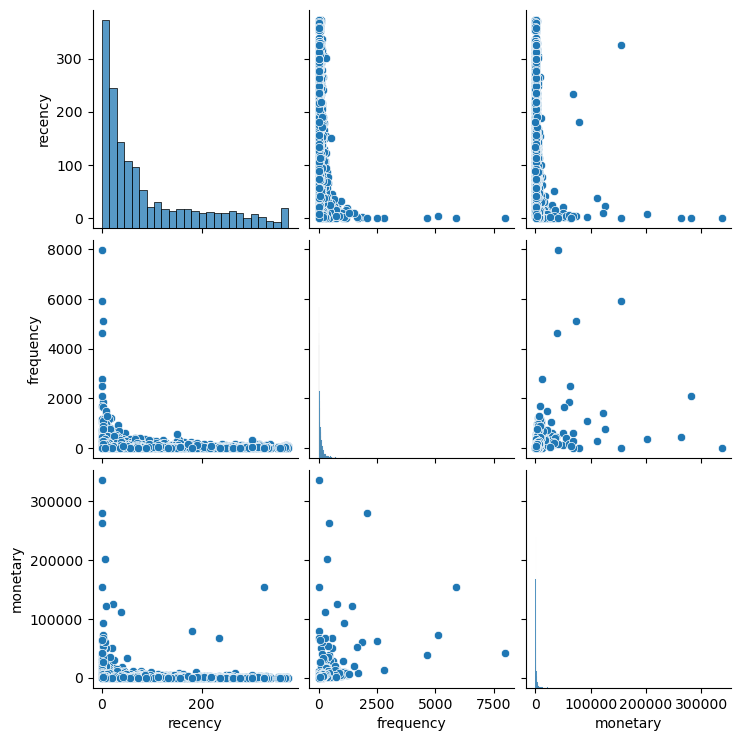

In [51]:
sns.pairplot(customer_df)

# Standardization

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

norm_customer = scaler.fit_transform(customer_df)

print(norm_customer)

[[8.71313673e-01 1.25281884e-04 4.58139611e-01]
 [2.68096515e-03 2.26760210e-02 1.27878528e-02]
 [1.98391421e-01 3.75845653e-03 5.33028275e-03]
 ...
 [1.87667560e-02 1.50338261e-03 5.29024605e-04]
 [8.04289544e-03 9.45878226e-02 6.21364254e-03]
 [1.12600536e-01 8.64445001e-03 5.44911666e-03]]


In [54]:
norm_customer

array([[8.71313673e-01, 1.25281884e-04, 4.58139611e-01],
       [2.68096515e-03, 2.26760210e-02, 1.27878528e-02],
       [1.98391421e-01, 3.75845653e-03, 5.33028275e-03],
       ...,
       [1.87667560e-02, 1.50338261e-03, 5.29024605e-04],
       [8.04289544e-03, 9.45878226e-02, 6.21364254e-03],
       [1.12600536e-01, 8.64445001e-03, 5.44911666e-03]])

In [56]:
customer_df.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,2,154367.20
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


# Kmeans implementation

In [57]:
def initialize_centroids(X, n_clusters):
    indices = np.random.choice(X.shape[0], n_clusters, replace=False)
    return X[indices]

def assign_points(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, n_clusters):
    new_centroids = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        new_centroids[i] = np.mean(X[labels == i], axis=0)
    return new_centroids

def kmeans(X, n_clusters, max_iter=300):
    centroids = initialize_centroids(X, n_clusters)
    
    for _ in range(max_iter):
        labels = assign_points(X, centroids)
        new_centroids = update_centroids(X, labels, n_clusters)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [59]:
data = customer_df[['recency', 'frequency', 'monetary']].values

data = (data - data.mean(axis=0)) / data.std(axis=0)

labels, centroids = kmeans(data, n_clusters=3)

customer_df['cluster'] = labels
print(customer_df.head(10))

            recency  frequency   monetary  cluster
CustomerID                                        
12346.0         325          2  154367.20        1
12347.0           1        182    4310.00        0
12348.0          74         31    1797.24        0
12349.0          18         73    1757.55        0
12350.0         309         17     334.40        2
12352.0          35         95    3466.67        0
12353.0         203          4      89.00        2
12354.0         231         58    1079.40        2
12355.0         213         13     459.40        2
12356.0          22         59    2811.43        0


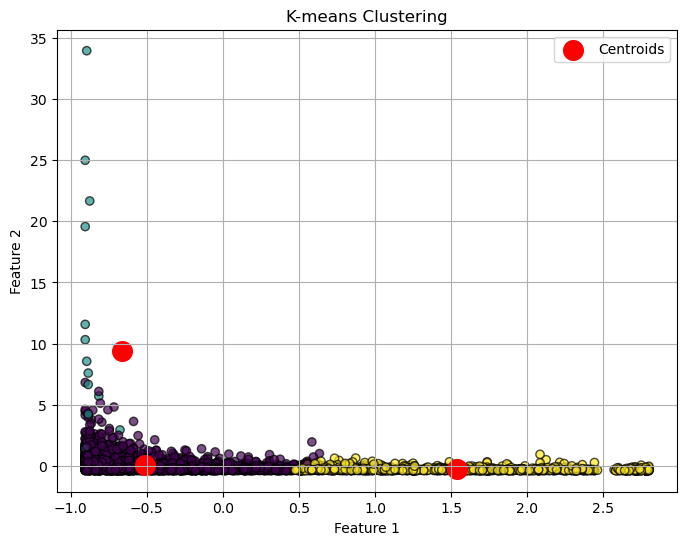

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Silhouette Score

In [61]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6072995101062757


It's a relatively good silhouette score, close to 1, which suggests that the clusters are well-separated and that each data point is quite similar to its own cluster and dissimilar from other clusters. This indicates that the clustering has produced distinct and well-defined clusters in your data.

# Inertia

In [62]:
inertia = 0
for i in range(centroids.shape[0]):
    inertia += np.sum((data[labels == i] - centroids[i])**2)
print(f"Inertia: {inertia}")

Inertia: 5561.21390381197


It signifies the cumulative sum of squared distances of all data points in your dataset to the centroids of their respective clusters.

Higher inertia values indicate that the clusters are more spread out, meaning the data points within each cluster are relatively farther away from their centroids. Conversely, lower inertia values imply more compact clusters, where data points are closer to their centroids, suggesting better-defined clusters.

When using inertia for evaluation, typically, a lower inertia is desirable as it indicates more cohesive and well-separated clusters. However, the interpretation of the absolute value can vary based on the dataset and problem context.